In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [2]:
df_2020 = pd.read_csv('2020_round_15_qualifying.csv')
df_2021 = pd.read_csv('2021_round_1_qualifying.csv')
df_2021.head()

Unnamed: 0  season  round                        cirquit  position driver  \
0           0    2021      1  Bahrain International Circuit         1    VER   
1           1    2021      1  Bahrain International Circuit         2    HAM   
2           2    2021      1  Bahrain International Circuit         3    BOT   
3           3    2021      1  Bahrain International Circuit         4    LEC   
4           4    2021      1  Bahrain International Circuit         5    GAS   

   driver_no constructor        q1        q2        q3  secs_q1  secs_q2  \
0         33    Red Bull  1:30.499  1:30.318  1:28.997   90.499   90.318   
1         44    Mercedes  1:30.617  1:30.085  1:29.385   90.617   90.085   
2         77    Mercedes  1:31.200  1:30.186  1:29.586   91.200   90.186   
3         16     Ferrari  1:30.691  1:30.010  1:29.678   90.691   90.010   
4         10  AlphaTauri  1:30.848  1:30.513  1:29.809   90.848   90.513   

   secs_q3  
0   88.997  
1   89.385  
2   89.586  
3   89.678  
4   89.809

In [3]:
null_2020 = df_2020.isnull().sum()[df_2020.isnull().sum() > 0]
null_2021 = df_2021.isnull().sum()[df_2021.isnull().sum() > 0]
print(null_2020)
print(null_2021)

q2          6
q3         10
secs_q2     6
secs_q3    10
dtype: int64
q2          5
q3         10
secs_q2     5
secs_q3    10
dtype: int64


In [4]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
Unnamed: 0     20 non-null int64
season         20 non-null int64
round          20 non-null int64
cirquit        20 non-null object
position       20 non-null int64
driver         20 non-null object
driver_no      20 non-null int64
constructor    20 non-null object
q1             20 non-null object
q2             15 non-null object
q3             10 non-null object
secs_q1        20 non-null float64
secs_q2        15 non-null float64
secs_q3        10 non-null float64
dtypes: float64(3), int64(5), object(6)
memory usage: 2.3+ KB


In [5]:
df_2020.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df_2021.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

# Q3 Driver analysis

In [6]:
q3_2020 = df_2020.dropna(subset=['secs_q3'], axis=0)
q3_2021 = df_2021.dropna(subset=['secs_q3'], axis=0)

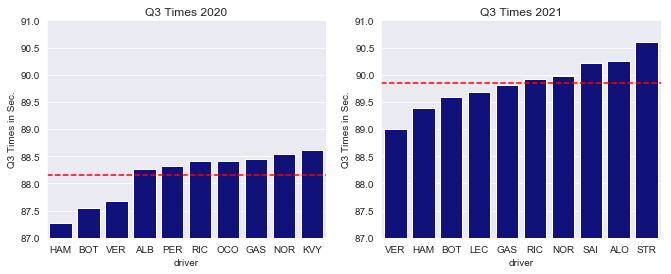

In [9]:
plt.figure(figsize=(11, 4))

plt.subplot(1,2,1)
sns.barplot(x='driver', y='secs_q3', data=q3_2020, color='darkblue')
plt.ylim(87, 91)
plt.ylabel('Q3 Times in Sec.')
plt.axhline(q3_2020['secs_q3'].mean(), ls='--', color='red')
plt.title("Q3 Times 2020")

plt.subplot(1,2,2)
sns.barplot(x='driver', y='secs_q3', data=q3_2021, color='darkblue')
plt.ylim(87, 91)
plt.ylabel('Q3 Times in Sec.')
plt.axhline(q3_2021['secs_q3'].mean(), ls='--', color='red')
plt.title("Q3 Times 2021");

plt.savefig("q3_times.png")

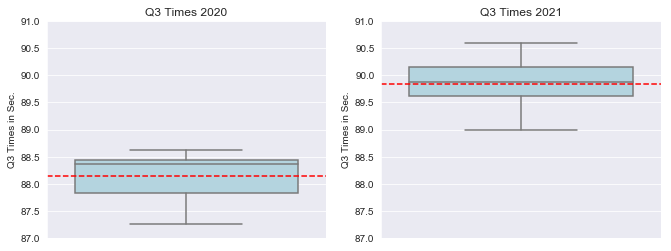

In [8]:
plt.figure(figsize=(11, 4))

plt.subplot(1,2,1)
sns.boxplot(y=q3_2020['secs_q3'], color='lightblue')
plt.ylabel('Q3 Times in Sec.')
plt.ylim(87, 91)
plt.axhline(q3_2020['secs_q3'].mean(), ls='--', color='red')
plt.title("Q3 Times 2020")

plt.subplot(1,2,2)
sns.boxplot(y=q3_2021['secs_q3'], color='lightblue')
plt.ylabel('Q3 Times in Sec.')
plt.ylim(87, 91)
plt.axhline(q3_2021['secs_q3'].mean(), ls='--', color='red')
plt.title("Q3 Times 2021");

plt.savefig("img/q3_times_distribution.png")

In [17]:
q3_2020.describe()

season  round  position  driver_no    secs_q1    secs_q2    secs_q3
count    10.0   10.0  10.00000  10.000000  10.000000  10.000000  10.000000
mean   2020.0   15.0   5.50000  26.200000  88.970600  88.573100  88.153500
std       0.0    0.0   3.02765  22.364655   0.312047   0.497325   0.473071
min    2020.0   15.0   1.00000   3.000000  88.343000  87.586000  87.264000
25%    2020.0   15.0   3.25000  10.250000  88.796500  88.209250  87.827000
50%    2020.0   15.0   5.50000  24.500000  88.988000  88.813000  88.369500
75%    2020.0   15.0   7.75000  32.500000  89.173000  88.926250  88.440750
max    2020.0   15.0  10.00000  77.000000  89.464000  89.008000  88.618000

In [18]:
q3_2021.describe()

season  round  position  driver_no    secs_q1    secs_q2    secs_q3
count    10.0   10.0  10.00000  10.000000  10.000000  10.000000  10.000000
mean   2021.0    1.0   5.50000  27.400000  90.932900  90.266100  89.842100
std       0.0    0.0   3.02765  24.432219   0.345797   0.235865   0.462109
min    2021.0    1.0   1.00000   3.000000  90.499000  90.009000  88.997000
25%    2021.0    1.0   3.25000  11.000000  90.717000  90.088500  89.609000
50%    2021.0    1.0   5.50000  17.000000  90.855500  90.204000  89.868000
75%    2021.0    1.0   7.75000  41.250000  91.125500  90.464250  90.154750
max    2021.0    1.0  10.00000  77.000000  91.653000  90.624000  90.601000

# Qualifying Constructor Analysis

In [19]:
q_constructor_2020 = df_2020[['constructor', 'secs_q1', 'secs_q2', 'secs_q3']].groupby(['constructor'], as_index=False).min()
q_constructor_2020['best_time'] = q_constructor_2020.min(axis=1)
q_constructor_2020['slow_time'] = q_constructor_2020.max(axis=1)
q_constructor_2020['delta_constructor'] = q_constructor_2020['slow_time'] - q_constructor_2020['best_time']
q_constructor_2020['delta_best'] = q_constructor_2020['best_time'] - q_constructor_2020['best_time'].min()
q_constructor_2020 = q_constructor_2020.sort_values(by='best_time', ascending=True)

q_constructor_2021 = df_2021[['constructor', 'secs_q1', 'secs_q2', 'secs_q3']].groupby(['constructor'], as_index=False).min()
q_constructor_2021['best_time'] = q_constructor_2021.min(axis=1)
q_constructor_2021['slow_time'] = q_constructor_2021.max(axis=1)
q_constructor_2021['delta_constructor'] = q_constructor_2021['slow_time'] - q_constructor_2021['best_time']
q_constructor_2021['delta_best'] = q_constructor_2021['best_time'] - q_constructor_2021['best_time'].min()
q_constructor_2021 = q_constructor_2021.sort_values(by='best_time', ascending=True)
q_constructor_2021

constructor  secs_q1  secs_q2  secs_q3  best_time  slow_time  \
8        Red Bull   90.499   90.318   88.997     88.997     90.499   
7        Mercedes   90.617   90.085   89.385     89.385     90.617   
4         Ferrari   90.691   90.009   89.678     89.678     90.691   
1      AlphaTauri   90.607   90.513   89.809     89.809     90.607   
6         McLaren   90.795   90.099   89.927     89.927     90.795   
2  Alpine F1 Team   90.863   90.595   90.249     90.249     90.863   
3    Aston Martin   91.261   90.624   90.601     90.601     91.261   
0      Alfa Romeo   90.998   90.708      NaN     90.708     90.998   
9        Williams   91.316   93.430      NaN     91.316     93.430   
5    Haas F1 Team   92.449      NaN      NaN     92.449     92.449   

   delta_constructor  delta_best  
8              1.502       0.000  
7              1.232       0.388  
4              1.013       0.681  
1              0.798       0.812  
6              0.868       0.930  
2              0.614       1.252  
3              0.660       1.604  
0              0.290       1.711  
9              2.114       2.319  
5              0.000       3.452

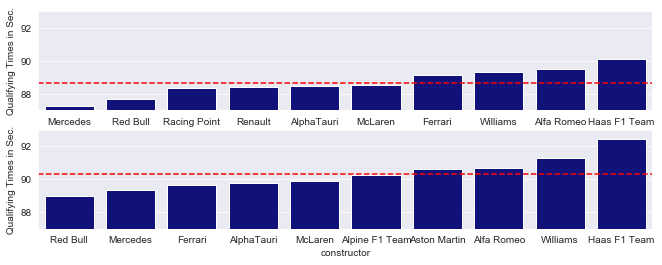

In [26]:
plt.figure(figsize=(11, 4))

plt.subplot(2,1,1)
sns.barplot(x='constructor', y='best_time', data=q_constructor_2020, color='darkblue')
plt.ylabel('Qualifying Times in Sec.')
plt.ylim(87, 93)
plt.axhline(q_constructor_2020['best_time'].mean(), ls='--', color='red')

plt.subplot(2,1,2)
sns.barplot(x='constructor', y='best_time', data=q_constructor_2021, color='darkblue')
plt.ylabel('Qualifying Times in Sec.')
plt.ylim(87, 93)
plt.axhline(q_constructor_2021['best_time'].mean(), ls='--', color='red');

In [36]:
# Who made the best improvements compared to last year's bahrain qualifying
delta_frame = pd.DataFrame({
    "constructor": ["Red Bull", "Mercedes", "Ferrari", "AlphaTauri", "McLaren", "Renault/Alpine", "Aston Martin/RP", "Alfa Romeo", "Williams", "Haas"],
    "best_2020": [87.678, 87.264, 89.137, 88.448, 88.542, 88.417, 88.322, 89.491, 89.294, 90.111],
    "best_2021": [88.997, 89.385, 89.678, 89.809, 89.927, 90.249, 90.601, 90.708, 91.316, 92.449]
})
delta_frame.head()

constructor  best_2020  best_2021
0    Red Bull     87.678     88.997
1    Mercedes     87.264     89.385
2     Ferrari     89.137     89.678
3  AlphaTauri     88.448     89.809
4     McLaren     88.542     89.927

In [42]:
delta_frame["delta"] = delta_frame['best_2021'] - delta_frame['best_2020']
delta_frame = delta_frame.sort_values(by='delta', ascending=True)
delta_frame.head()

constructor  best_2020  best_2021  delta
2     Ferrari     89.137     89.678  0.541
7  Alfa Romeo     89.491     90.708  1.217
0    Red Bull     87.678     88.997  1.319
3  AlphaTauri     88.448     89.809  1.361
4     McLaren     88.542     89.927  1.385

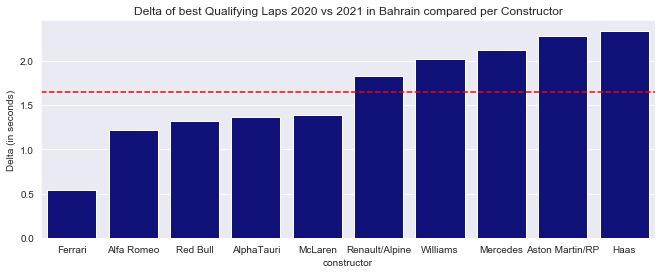

In [48]:
plt.figure(figsize=(11, 4))
sns.barplot(x='constructor', y='delta', data=delta_frame, color='darkblue')
plt.ylabel('Delta (in seconds)')
plt.axhline(delta_frame['delta'].mean(), ls='--', color='red')
plt.title("Delta of best Qualifying Laps 2020 vs 2021 in Bahrain compared per Constructor");
plt.savefig("constructor_delta_compare.png")